<a href="https://colab.research.google.com/github/dawbit/-SEM6-PSAMP/blob/master/Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Keras to biblioteka oprogramowania typu open source, która zapewnia interfejs Pythona dla sztucznych sieci neuronowych. Keras działa jako interfejs dla biblioteki TensorFlow. Do wersji 2.3 Keras obsługiwały wiele backendów, w tym TensorFlow, Microsoft Cognitive Toolkit, Theano i PlaidML

 Keras is an API designed for human beings, not machines. Keras follows best practices for reducing cognitive load: it offers consistent & simple APIs, it minimizes the number of user actions required for common use cases, and it provides clear & actionable error messages. It also has extensive documentation and developer guides. 

Dla osób korzystających z anacondy, można skonfigurować środowiska uruchomieniowe, których potem można używać w wybranej przez siebie aplikacji. Aby to zrobić, należy najpierw przejść do zakładki "Environments".

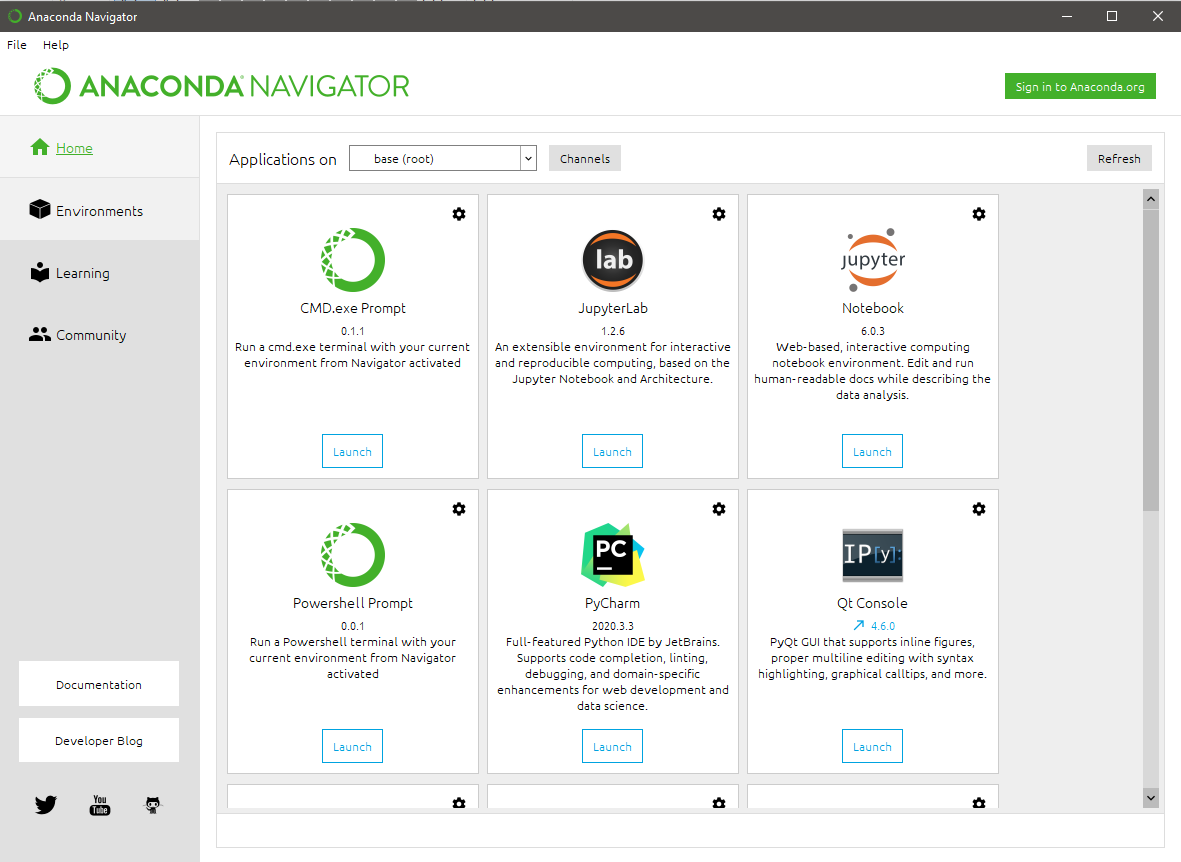

Następnie klikamy na przycisk "create". Wyskoczy nam wtedy okienko, gdzie będziemy odpowiednio nazwać swoje środowisko.

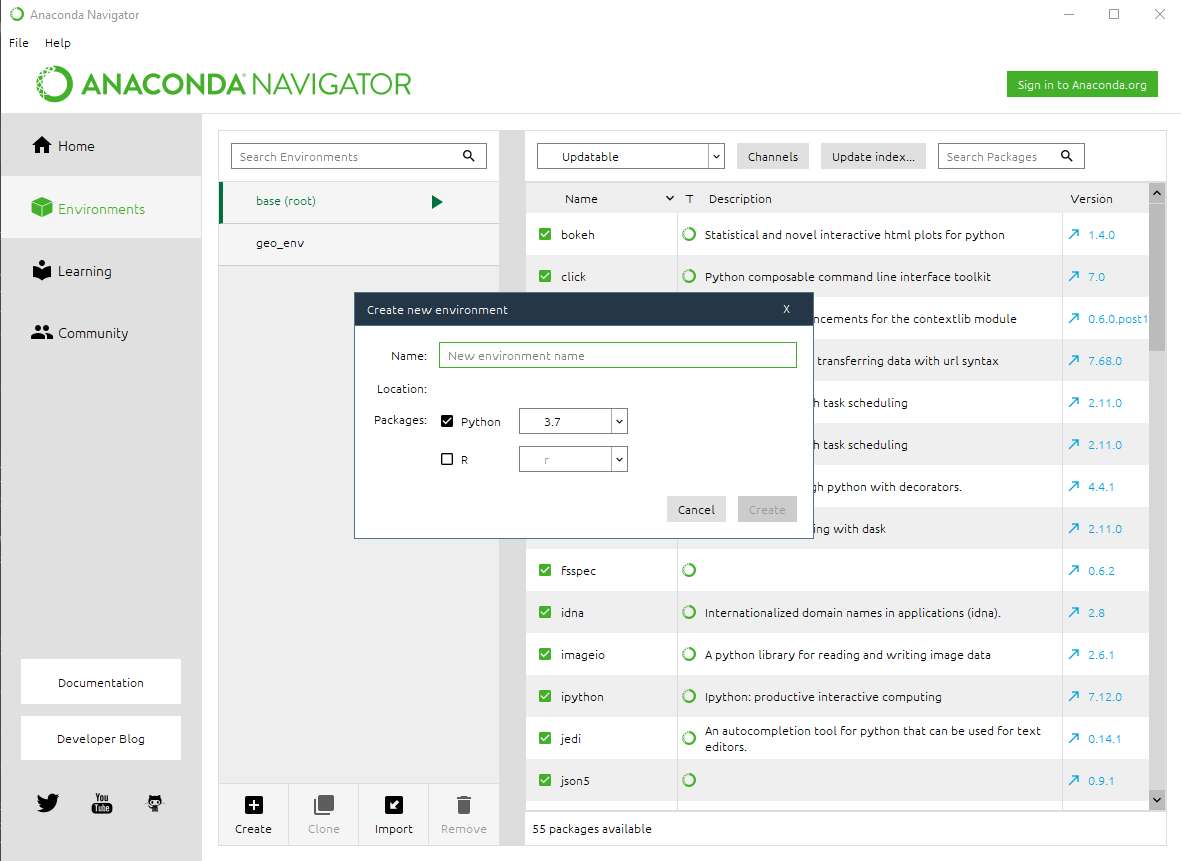

Wpisujemy nazwę i potwierdzamy przyciskiem "create".

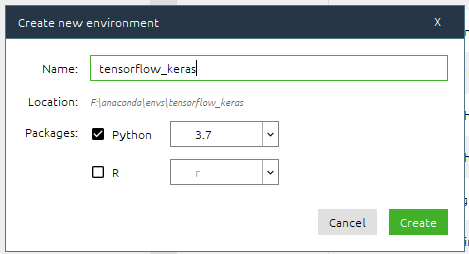

Po utworzeniu nowego środowiska, należy dograć do niego interesujące nas pakiety. Aby to zrobić, należy najpierw wybrać z listy rozwijanej opcję "Not installed".

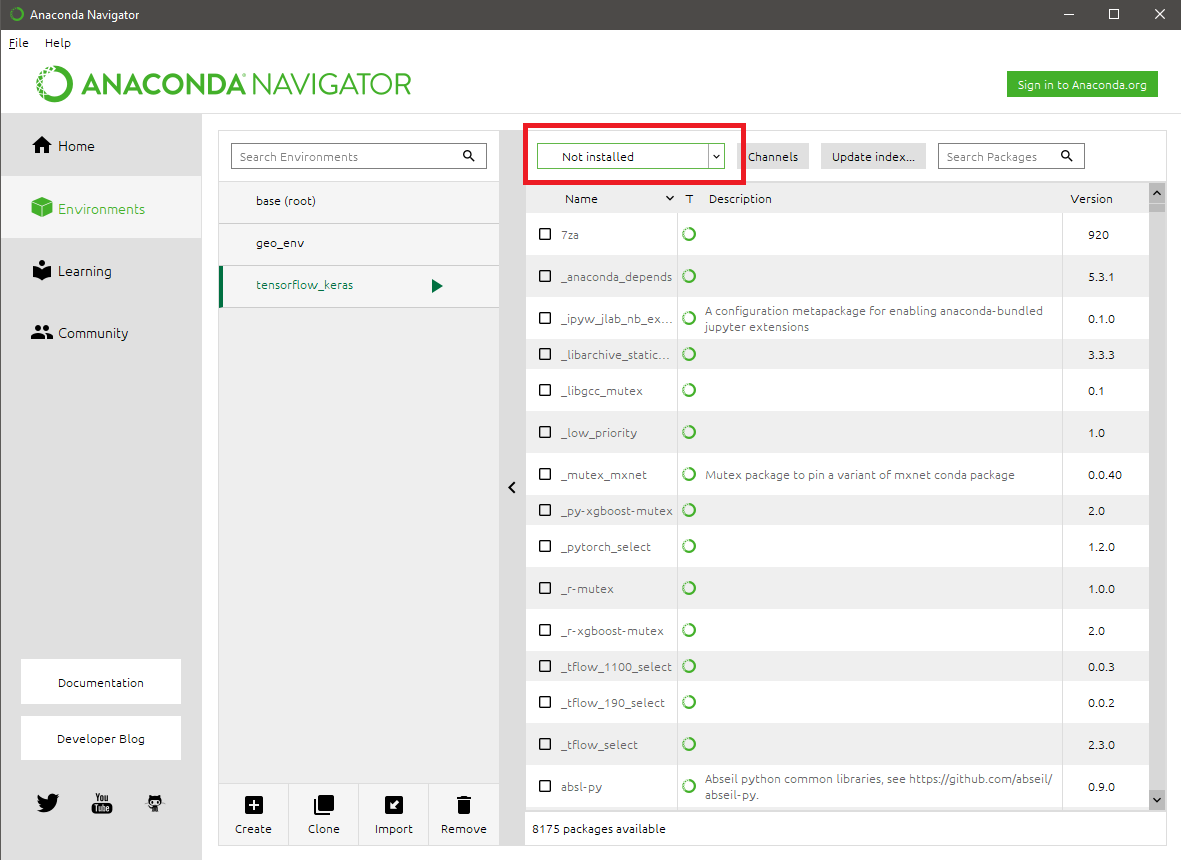

Następnie w wyszukiwarce wpisujemy interesujący nas pakiet, w tym przypadku będzie to Tensorflow.

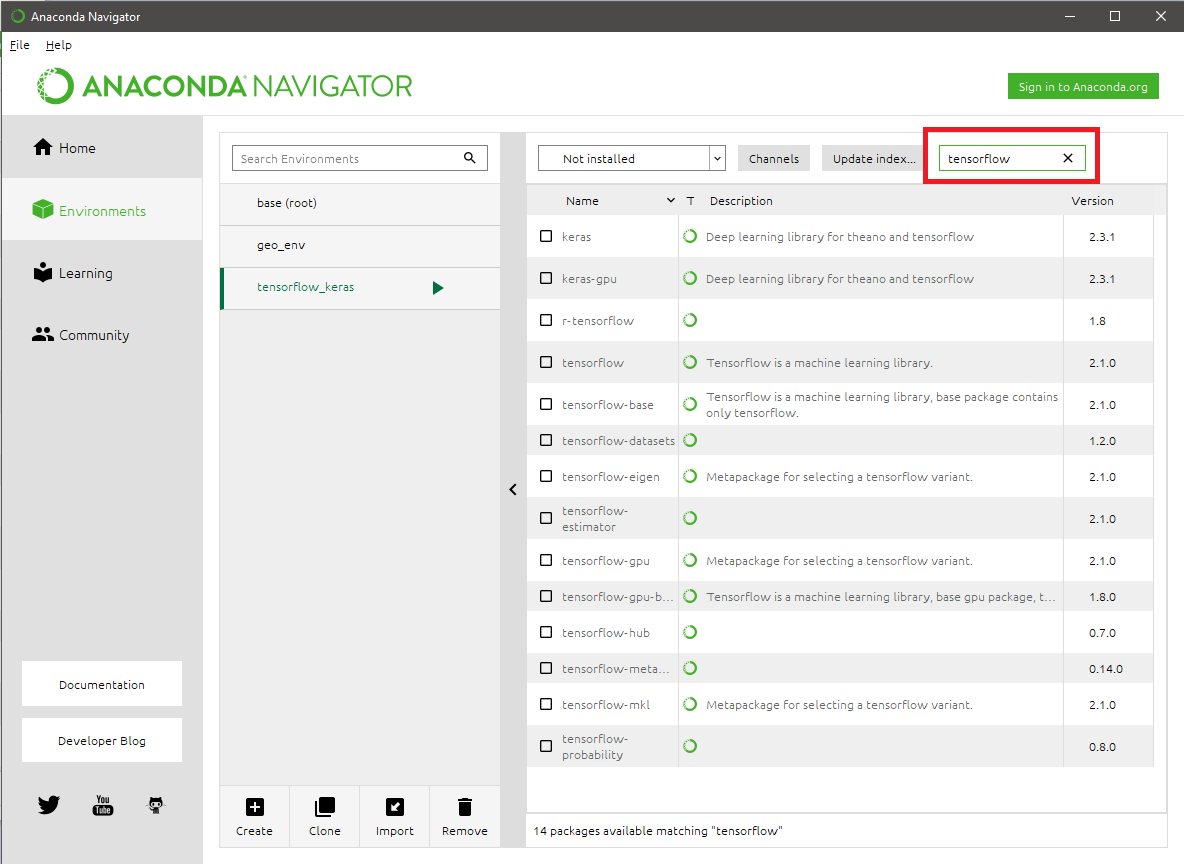

Zaznaczamy szukany pakiet i klikamy "Apply".

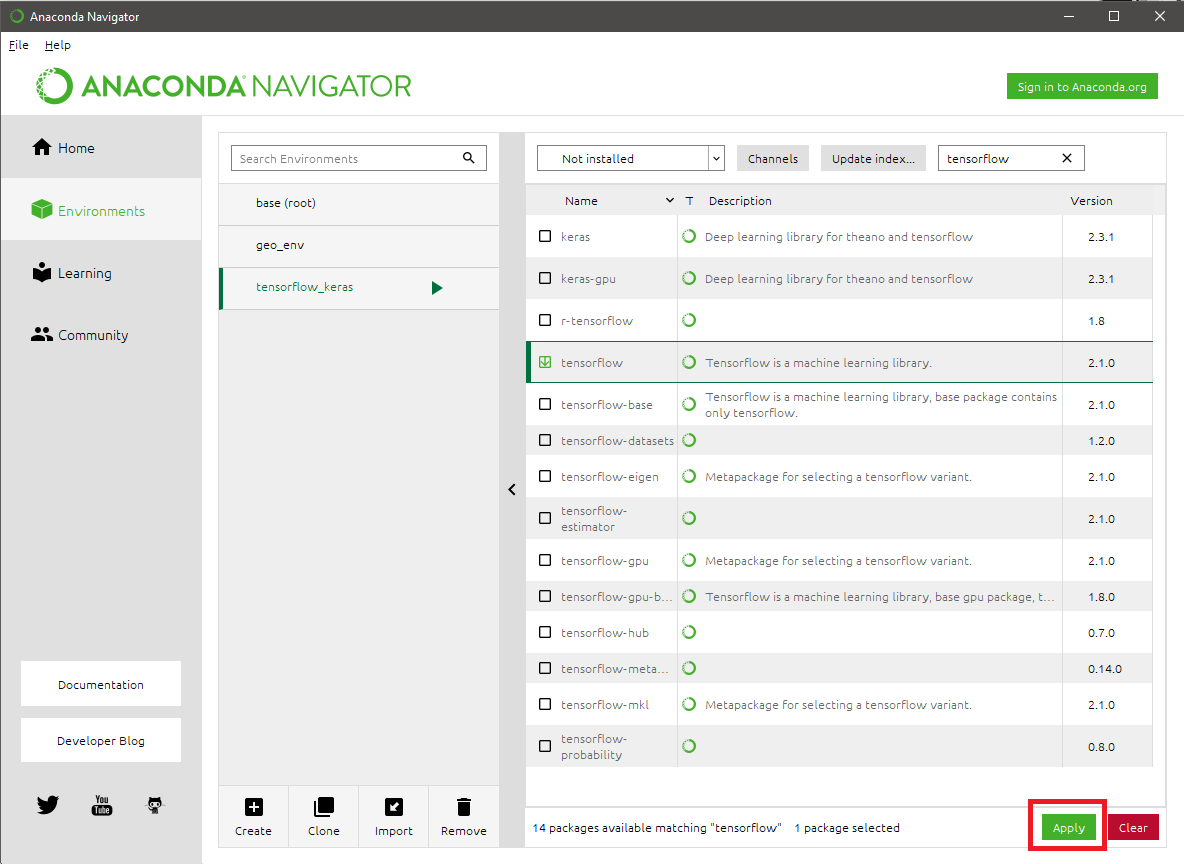

Po kliknięciu pojawi się okno z informacją, jakie pakiety zostaną zainstalowane w ramach paczki Tensorflow. Klikamy Apply i oczekujemy końca instalacji.

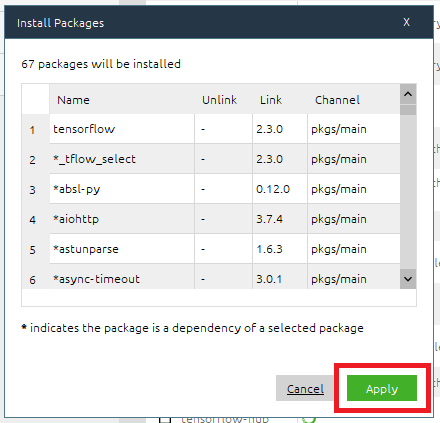

Co prawda keras jest zawarty w pakiecie tensorflow, jednak instieje także jako biblioteka standalone, przez co możemy ją także zainstalować z osobna, jeśli ktoś by miał taką potrzebę. Aby tego dokonać, powtarzamy te same czynności, tylko tym razem dla pakietu "keras".


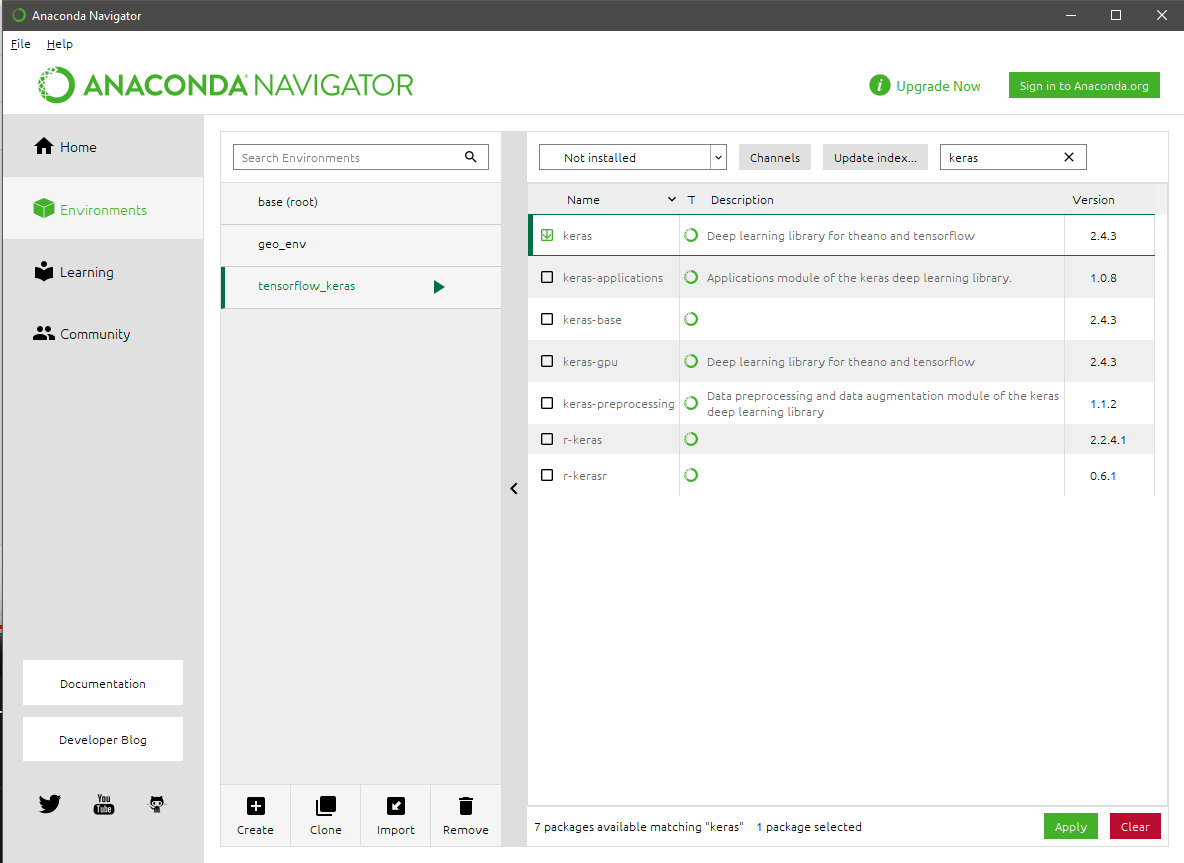

Jak już wszystko przebiegnie pomyślnie, to wracamy do zakładki "Home", z listy rozwijanej wybieramy naszą nazwę środowiska i klikamy "Launch" przy aplikacji, z której chcemy korzystać.

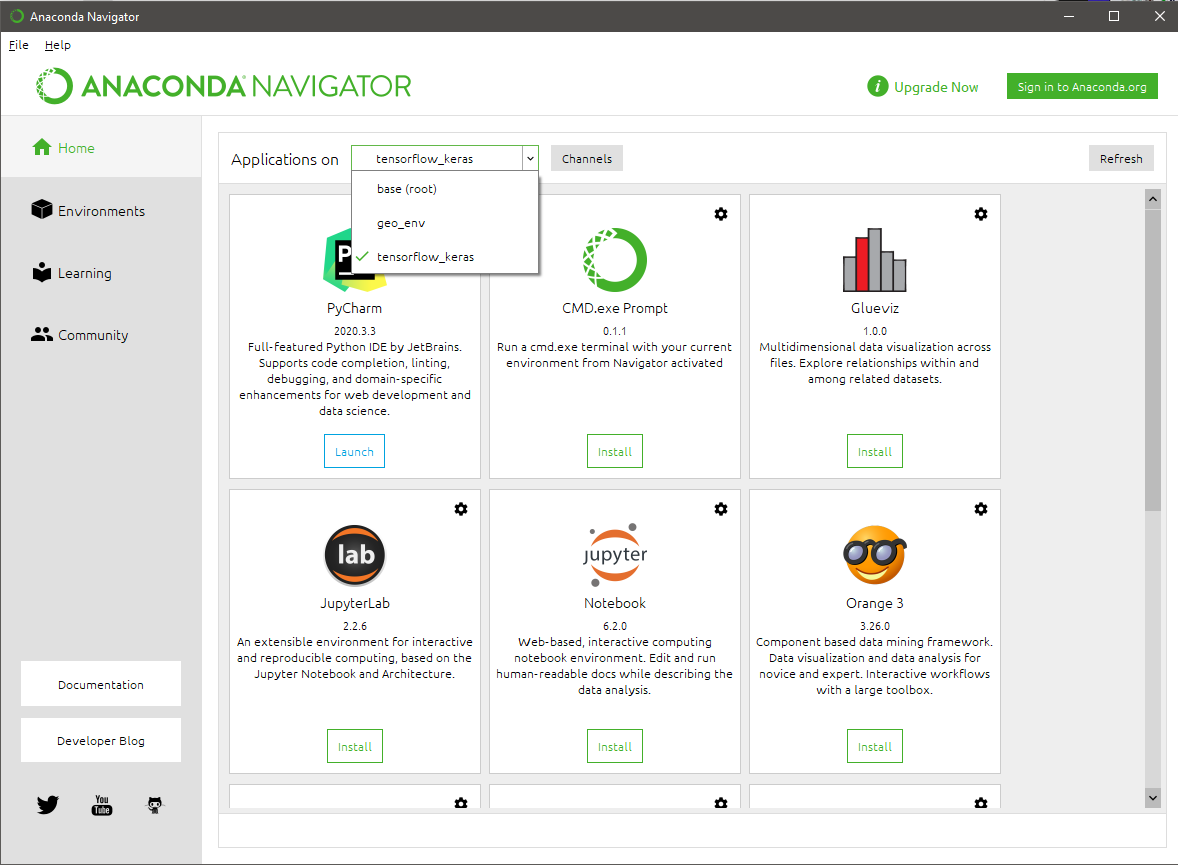

Jeśli korzystamy z prekonfigurowanych środowisk, takich jak "Kaggle", czy "Google Collab", to istnieje bardzo duże prawdopodobieństwo, iż tensorflow będzie już preinstalowany. Aby to sprawdzić, należy na początku dokumentu zrobić odpowiednie importy i spróbować wyprintować wersję tensorflowa.

In [96]:
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(keras.__version__)

2.4.1
2.4.0


Trochę praktyki

In [97]:
import tensorflow as tf
print(tf.__version__)

import numpy as np # Do algebry liniowej
import pandas as pd # do przetwarzania danych - pliki CSV
import matplotlib.pyplot as plt
from keras.models import Sequential # dostarcza model sekwencyjny - sekwencje warstwa
from keras.layers import Flatten, Dense # flatten bierze wszystkie inputy i spłaszcza je do 1wymiarowej warstwy
                                        # W dense layer każdy neuron jest wewnętrznie połączony z każdym
%matplotlib inline

# tf.keras.datasets.fashion_mnist.load_data()




2.4.1


## Wczytywanie datasetu

Fashion MNIST zawiera 70k skategoryzowanych zdjęć części garderoby z Zalando. 60k z nich to dane do szkolenia, a 10k do trenowania. Każde ubranie ma przypisany swój kod kategorii:


0.   T-shirt / top
1.   Spodnie
2.   Swetry
3.   Sukienki
4.   Płaszcze
5.   Sandały
6.   Koszule
7.   Sneakersy
8.   Torebki
9.   Buty za kostkę



<Figure size 432x288 with 0 Axes>

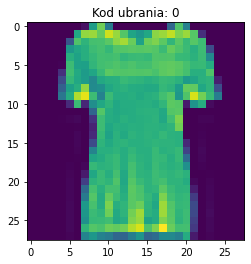

<Figure size 432x288 with 0 Axes>

In [98]:
from keras.datasets import fashion_mnist # importujemy dataset z kerasa
(x_training_data, x_label),(y_test_data, y_label) = fashion_mnist.load_data() 
# wczytujemy 60k zdjęć z opisami do listy trenującej oraz 10k zdjęć z opisami do listy testującej

plt.imshow(x_training_data[10])
plt.title('Kod ubrania: {}'.format(x_label[10]))
plt.figure()

Jak widać, keras może nam posłużyć jako źródło danych do naszych projektów.

##Normalizacja danych
Dane normalizujemy dlatego, iż surowe informacje z datasetu są zbyt duże, aby na nich pracować. Normalizacja spłyci nam poziom szczegółowości, ale na tyle, że wciąż spokojnie będzie można pracować na tych danych z zadowalającymi wynikami.

Dzięki kerasowi nie musimy pisać sami funkcji normalizujących. Wystarczy, że wybierzemy odpowiednią dla naszych potrzeb.

<Figure size 432x288 with 0 Axes>

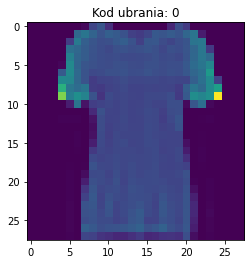

<Figure size 432x288 with 0 Axes>

In [99]:
x_training_data = keras.utils.normalize(x_training_data, axis = 1) # wywołujemy funkcję normalizującą zdjęcia dla zbioru trenującego i testowego
y_test_data = keras.utils.normalize(y_test_data, axis = 1)

plt.imshow(x_training_data[10])
plt.title('Kod ubrania: {}'.format(x_label[10]))
plt.figure()

##Budowanie modelu

In [100]:
model = Sequential()
model.add(Flatten(input_shape=((28, 28))))    # Flatten spłaszczy nasze dane do jednowymiarowej listy.
                                              # Jak widać na wykresie powyżej, pojedyncze zdjęcie składa się z 28x28 pixeli, dlatego też taki wymiar podajemy
model.add(Dense(200, activation = "relu"))    # Nasze Dense to ukryta warstwa. Używamy w niej 200 neuronów i funkcji aktywacyjnej "relu". 
                                              # Relu - rectify lineral unit (jeśli dostanie ujemne wartości, to zrobi z nich 0, w przeciwnym wypadku pozostawi bez zmian).
model.add(Dense(10, activation = "softmax"))  # Tutaj tworzymy warstwę wyjściową. 10 neuronów reprezentuje 10 klas ubrań, które mamy w datasecie.

##Kompilowanie modelu

In [101]:
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"]) # Używamy Adama jako optymizera, oraz categorical crossentropy, 
                                                                                                    # ponieważ mamy wiele kategorii w naszym modelu. Dzięki użyciu 
                                                                                                    # "sparse" nie musimy kodować danych do postaci one-hot.

##Model fitting

In [102]:
model.fit(x_training_data, x_label, epochs = 20)

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6316 - accuracy: 0.7761
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3618 - accuracy: 0.8685
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3259 - accuracy: 0.8786
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2986 - accuracy: 0.8868
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2734 - accuracy: 0.8980
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2612 - accuracy: 0.9028
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2466 - accuracy: 0.9069
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2334 - accuracy: 0.9125
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2241 - accuracy: 0.9157
Epoch 10/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.209

##Ocenianie modelu na danych testowych

In [103]:
model.evaluate(y_test_data, y_label) # Otrzymaliśmy 89% dokładności z danymi testowymi. 

313/313 [==============================] - 1s 2ms/step - loss: 0.3639 - accuracy: 0.8851


[0.36393263936042786, 0.8851000070571899]

##Przewidywanie pierwszych 20 obrazów

In [104]:
predicted = model.predict(y_test_data[:20])
print(predicted)

[[1.19493171e-09 6.99315113e-16 3.26921740e-10 2.73172327e-12
  3.84805859e-12 1.42866702e-05 3.20572369e-09 8.42752488e-05
  4.75142370e-10 9.99901414e-01]
 [4.97542263e-04 1.51406708e-12 9.97983217e-01 2.73367817e-09
  1.24638784e-03 9.70645608e-09 2.72800768e-04 1.52633230e-08
  1.05058410e-11 4.71841732e-10]
 [4.12477789e-07 9.99999642e-01 4.95908089e-12 4.02802858e-09
  8.91257380e-12 7.15593085e-14 6.33702049e-11 2.21686272e-22
  1.42664014e-14 6.60604384e-15]
 [3.37302353e-10 1.00000000e+00 5.25911237e-14 3.03019387e-09
  6.55499743e-12 2.17478123e-15 2.58938769e-12 2.98884251e-24
  2.40879600e-16 2.17716948e-17]
 [2.69623518e-01 1.69456951e-12 6.90346723e-03 8.49977459e-06
  1.22727663e-03 1.01132684e-06 7.22235680e-01 4.57367998e-12
  3.39023831e-09 5.71467808e-07]
 [1.20260811e-05 9.99987721e-01 5.99278778e-08 6.91744617e-08
  2.05537418e-08 2.12645613e-11 1.48627581e-08 3.02147604e-17
  2.25602219e-12 1.86331137e-12]
 [3.10052783e-08 2.97278716e-12 6.98715856e-04 5.95984937e

Uzyskane wynik w notacji naukowej to rozkład prawdopodobieństwa. Za dużo nam nie mówi, więc użyjemy na nim argmaxa.



In [105]:
predicted = np.argmax(predicted, axis = 1) # przekazujemy rokład prawdopodbieństwa do
print(predicted)
print(y_label[:20])

[9 2 1 1 6 1 4 6 5 7 4 5 5 3 4 1 2 2 8 0]
[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0]


Jak widać przewidywany wynik pomylił się 2 razy na 20 przewidywań więc mniej więcej pokrywa się to z naszymi 89% dokładności.

## Wizualizacja wyników

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


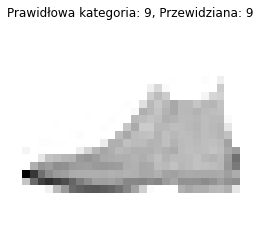

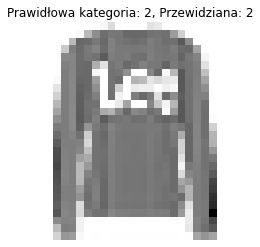

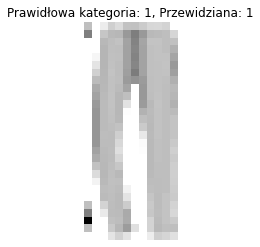

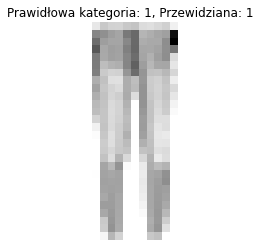

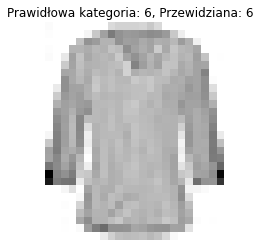

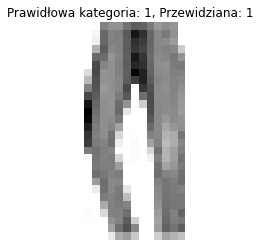

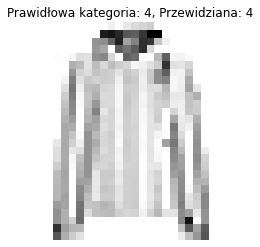

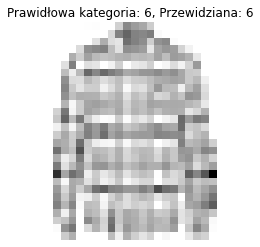

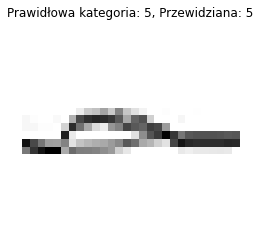

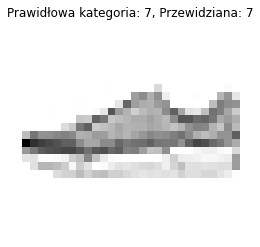

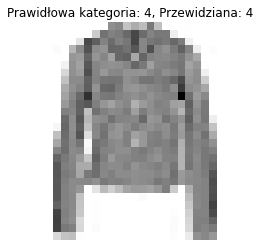

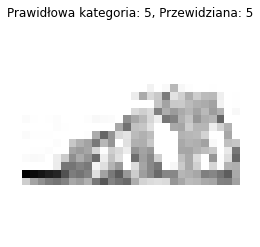

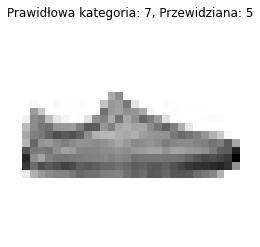

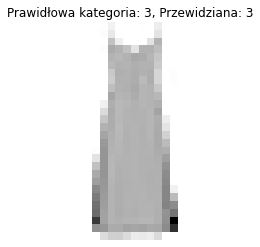

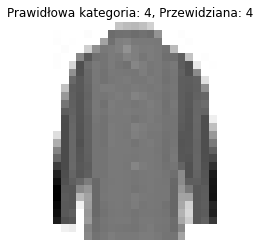

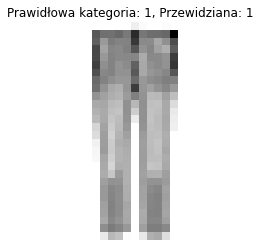

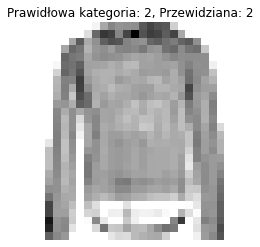

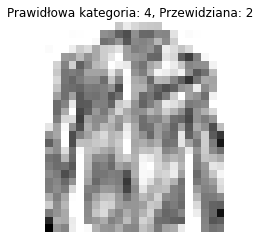

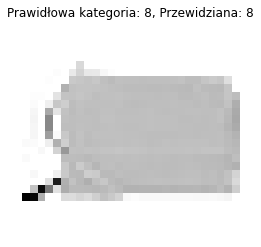

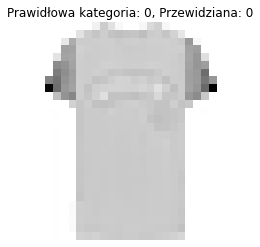

<Figure size 432x288 with 0 Axes>

In [106]:
for i in range(20):
  plt.imshow(y_test_data[i], cmap = "binary")
  plt.title('Prawidłowa kategoria: {}, Przewidziana: {}'.format(y_label[i], predicted[i]))
  plt.axis('Off')
  plt.figure()

# Przykład klasyfikacji wieloklasowej: klasyfikacja krótkich artykułów prasowych

W tym przykładzie będziemy pracować nad zbiorem danych Agencji Reutera — zestawem krótkich informacji prasowych dotyczących określonego tematu, które zostały opublikowane przez tę agencję w 1986 r. Jest to prosty i popularny zbiór danych, doskonalenadający się do eksperymentowania z klasyfikacją tekstu. Zbiór ten zawiera 46 różnych tematów. Do niektórych z nich należy o wiele więcej informacji prasowych niż do innych, ale każdy z tematów ma przynajmniej 10 przykładów w treningowym zbiorze danych. Zbiór Agencji Reutera wchodzi w skład pakietu Keras.

Stosujemy argument num_words = 10000, który ogranicza nasze działania do 10 000 słów występujących najczęściej w analizowanymzbiorze danych.


In [107]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


Dysponujemy 8982 przykładami treningowymi i 2246 przykładami testowymi:

In [108]:
print(len(train_data))
print(len(test_data))

8982
2246


## Przykłady odkodowanych danych ze zbioru:

In [109]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

## Przygotowywanie danych:

In [110]:
import numpy as np
from keras.utils.np_utils import to_categorical

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), 10000))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [111]:
x_train = vectorize_sequences(train_data) # zbiór treningowy w postaci wektora
x_test = vectorize_sequences(test_data) # zbiór testowy w postaci wektora

# Konwertuje wektor klasy (liczby całkowite) na binarną macierz klas.
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

## Budowanie sieci
# Wąskie gardło informacyjne
W  przypadku  stosowania  stosu  warstw  Dense  każda  warstwa  ma  dostęp tylko  do  informacji  wygenerowanych  przez  poprzednią  warstwę.  Jeżeli  jakaś  informacja ważna z punktu widzenia klasyfikacji zostanie pominięta przez którąś z warstw, to nie ma możliwości jej odzyskania przez kolejne warstwy. Każda warstwa może potencjalnie stać się  informacyjnym  wąskim  gardłem. Zaczniemy od 64 jednostek.

In [112]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

## Kompilacja modelu

In [113]:
model.compile(optimizer='rmsprop',              
              loss='categorical_crossentropy',              
              metrics=['accuracy'])

## Walidacja modelu
Odłączmy 1000 próbek od treningowego zbioru danych w celu użycia ich w charak-terze zbioru kontrolnego.

Poniżej uruchamiamy trenowanie, trwające 20 epok.

In [114]:
X_val = x_train[:1000]
partial_X_train = x_train[1000:]

Y_val = one_hot_train_labels[:1000]
partial_Y_train = one_hot_train_labels[1000:]

history = model.fit(partial_X_train,
                   partial_Y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(X_val, Y_val))

Epoch 1/20
16/16 [==============================] - 2s 64ms/step - loss: 3.0495 - accuracy: 0.3867 - val_loss: 1.6795 - val_accuracy: 0.6400
Epoch 2/20
16/16 [==============================] - 1s 50ms/step - loss: 1.4328 - accuracy: 0.6986 - val_loss: 1.2778 - val_accuracy: 0.7340
Epoch 3/20
16/16 [==============================] - 1s 50ms/step - loss: 1.0361 - accuracy: 0.7814 - val_loss: 1.1162 - val_accuracy: 0.7610
Epoch 4/20
16/16 [==============================] - 1s 49ms/step - loss: 0.8005 - accuracy: 0.8334 - val_loss: 1.0366 - val_accuracy: 0.7780
Epoch 5/20
16/16 [==============================] - 1s 48ms/step - loss: 0.6460 - accuracy: 0.8678 - val_loss: 0.9857 - val_accuracy: 0.7900
Epoch 6/20
16/16 [==============================] - 1s 49ms/step - loss: 0.4892 - accuracy: 0.9031 - val_loss: 0.9328 - val_accuracy: 0.8000
Epoch 7/20
16/16 [==============================] - 1s 48ms/step - loss: 0.3907 - accuracy: 0.9195 - val_loss: 0.8953 - val_accuracy: 0.8120
Epoch 8/20
16

## Przewidywanie wyników i ocena

In [115]:
results = model.evaluate(x_test, one_hot_test_labels)

71/71 [==============================] - 0s 3ms/step - loss: 1.2457 - accuracy: 0.7836


## Strata trenowania i walidacji

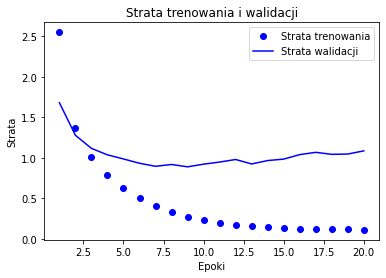

In [116]:
import matplotlib.pyplot as plt

history_dict = history.history
history_dict.keys()
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label="Strata trenowania")
plt.plot(epochs, val_loss_values, 'b', label="Strata walidacji")

plt.title('Strata trenowania i walidacji')
plt.xlabel('Epoki')
plt.ylabel('Strata')
plt.legend()

plt.show()

## Dokładność trenowania i walidacj

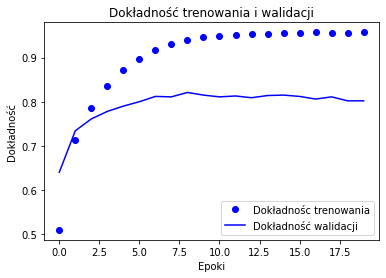

In [117]:
plt.clf()

model.compile(loss="categorical_crossentropy",
              metrics=["accuracy"])
 
plt.plot(history.history['accuracy'], 'bo')
plt.plot(history.history['val_accuracy'], 'b')
plt.title('Dokładność trenowania i walidacji')
plt.ylabel('Dokładność')
plt.xlabel('Epoki')
plt.legend(['Dokładnośc trenowania', 'Dokładność walidacji'], loc='lower right')

plt.show()

Po ok. dziewięciu epokach sieć zaczyna ulegać przeuczeniu. Spróbujmy uruchomić jeszcze raz proces uczenia sieci, ale tym razem ograniczymy jego działanie do 8 epok. Następnie sprawdzimy działanie sieci na testowym zbiorze danych.

In [118]:
# Definicja modelu
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))


# Kompilacja modelu
model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])


# Trenowanie modelu
model.fit(partial_X_train,
         partial_Y_train,
         epochs=8,
         batch_size=512,
         validation_data=(X_val, Y_val))

Epoch 1/8
16/16 [==============================] - 2s 74ms/step - loss: 3.0660 - accuracy: 0.3552 - val_loss: 1.6776 - val_accuracy: 0.6360
Epoch 2/8
16/16 [==============================] - 1s 58ms/step - loss: 1.4582 - accuracy: 0.7009 - val_loss: 1.2795 - val_accuracy: 0.7180
Epoch 3/8
16/16 [==============================] - 1s 70ms/step - loss: 1.0429 - accuracy: 0.7740 - val_loss: 1.1278 - val_accuracy: 0.7550
Epoch 4/8
16/16 [==============================] - 1s 66ms/step - loss: 0.8289 - accuracy: 0.8236 - val_loss: 1.0430 - val_accuracy: 0.7730
Epoch 5/8
16/16 [==============================] - 1s 70ms/step - loss: 0.6552 - accuracy: 0.8665 - val_loss: 0.9768 - val_accuracy: 0.7990
Epoch 6/8
16/16 [==============================] - 1s 66ms/step - loss: 0.5181 - accuracy: 0.8993 - val_loss: 0.9273 - val_accuracy: 0.8050
Epoch 7/8
16/16 [==============================] - 1s 68ms/step - loss: 0.4239 - accuracy: 0.9130 - val_loss: 0.8955 - val_accuracy: 0.8100
Epoch 8/8
16/16 [===

## Przewidywanie wyników i ocena

In [119]:
results = model.evaluate(x_test, one_hot_test_labels)

71/71 [==============================] - 0s 4ms/step - loss: 0.9972 - accuracy: 0.7863


Uzyskaliśmy dokładność na poziomie zbliżonym do 80%.